# Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.subplots as sp
import colorlover as cl
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Đường dẫn file
url = 'https://drive.google.com/file/d/1ddsDdw_kXvLDSEYWDUcmKkkjZNBQ2Fsw/view?usp=sharing'
path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(path)

In [ ]:
df = pd.read_csv(path)

# 1. Xử lý dữ liệu

## 1.1. Đổi các giá trị rỗng thành NAN

In [ ]:
#Đổi các giá trị rỗng thành Nan
df.replace(
    to_replace=[".", "?", "_", "-"," ", "None", "NULL", "Not", "|"],
    value=np.nan,
    inplace= True
)

In [ ]:
df.dtypes

Name                    object
Rate                   float64
NumRating               object
Brand                   object
ModelNumber             object
ModelYear                int64
Shape                   object
WindowMaterial          object
Display                 object
CaseMaterial            object
CaseDiameter            object
CaseThickness           object
BandMaterial            object
BandWidth               object
BandColor               object
BezelMaterial           object
Weight                  object
Movement                object
WaterResistantDepth     object
Price                  float64
dtype: object

In [ ]:
df.isnull().sum()

Name                     0
Rate                    72
NumRating               72
Brand                    0
ModelNumber              0
ModelYear                0
Shape                    1
WindowMaterial           1
Display                  0
CaseMaterial             0
CaseDiameter             0
CaseThickness            0
BandMaterial             0
BandWidth                0
BandColor                0
BezelMaterial            7
Weight                 258
Movement                27
WaterResistantDepth    129
Price                    0
dtype: int64

<li>Rate                    72
<li>NumRating               72
<li>Shape                    1
<li>WindowMaterial           1
<li>Weight                 258
<li>Movement                27
<li>WaterResistantDepth    129

## 1.2. Xử lý giá trị bị khuyết, đổi đơn vị và đổi kiểu dữ liệu

In [ ]:
#Hàm xóa và đổi đơn vị
def DelDonVi(col: pd.Series, donVi: str):
    if donVi == 'Ounces':
        col = col.apply(lambda x: float(x.replace('Ounces', '')) * 28.3495 if isinstance(x, str) and 'Ounces' in x else x)
        return col
    if donVi == 'Pounds':
        col = col.apply(lambda x: float(x.replace('Pounds', '')) * 453.59237 if isinstance(x, str) and 'Pounds' in x else x)
        return col
    if donVi == 'Feet':
        col = col.apply(lambda x: float(x.replace('Feet', '')) * 0.3048 if isinstance(x, str) and 'Feet' in x else x)
        return col
    if donVi == 'centimeters':
        col = col.apply(lambda x: float(x.replace('centimeters', '')) * 10 if isinstance(x, str) and 'centimeters' in x else x)
        return col
    if donVi == 'inches':
        col = col.apply(lambda x: float(x.replace('inches', '')) * 25.4 if isinstance(x, str) and 'inches' in x else x)
        return col
    if donVi == 'bar':
        col = col.apply(lambda x: float(x.replace('bar', '')) * 10 if isinstance(x, str) and 'bar' in x else x)
        return col

    col = col.str.replace(donVi, '')
    return col

### 1.2.1. Xử lý cột Rate

In [ ]:
#Thay các giá trị bị khuyết bằng giá trị ngẫu nhiên từ 0 đến 5
for index, row in df.iterrows():
    if pd.isna(row['Rate']):
        df.at[index, 'Rate'] = np.random.uniform(1, 5).__round__(2)

In [ ]:
df['Rate']

0      4.50
1      4.60
2      4.20
3      4.60
4      4.70
5      4.10
6      4.50
7      4.70
8      4.50
9      4.10
10     3.80
11     4.40
12     3.90
13     4.70
14     4.50
15     4.50
16     4.70
17     2.50
18     4.60
19     4.50
20     4.80
21     4.40
22     4.60
23     4.10
24     4.60
25     4.30
26     4.60
27     4.60
28     4.80
29     4.60
30     3.60
31     4.60
32     4.30
33     4.80
34     4.60
35     4.40
36     1.69
37     4.50
38     4.40
39     4.60
40     4.70
41     4.30
42     4.30
43     3.90
44     4.40
45     4.60
46     4.70
47     4.80
48     4.50
49     4.50
50     4.70
51     4.60
52     4.90
53     4.20
54     4.08
55     4.10
56     4.40
57     4.50
58     4.60
59     4.40
60     4.40
61     4.70
62     4.10
63     4.60
64     4.30
65     4.50
66     4.70
67     4.50
68     4.50
69     4.80
70     4.90
71     4.60
72     4.60
73     4.50
74     4.60
75     4.70
76     4.10
77     4.40
78     4.30
79     4.70
80     4.60
81     4.70
82     4.70
83  

### 1.2.2. Xử lý cột NumRating

In [ ]:
#Xử lý cột NumRating - Đổi kiểu dữ liệu thành INT và Nan = 0
df['NumRating'] = df['NumRating'].fillna(0).replace(',', '', regex=True).astype(int)

#Thay các giá trị bị khuyết bằng giá trị ngẫu nhiên từ 1 đến 10000
for index, row in df.iterrows():
    if pd.isna(row['NumRating']):
        df.at[index, 'NumRating'] = np.random.randint(1, 10000)

In [ ]:
df['NumRating']

0        108
1         71
2         43
3       2926
4        145
5         13
6         28
7         27
8        133
9         18
10        26
11        14
12        26
13       784
14      1702
15        78
16        59
17         2
18      1363
19       103
20        11
21       147
22       390
23        22
24       315
25        98
26        16
27       329
28      1037
29        75
30        11
31        18
32        21
33       486
34      1177
35       121
36         0
37      3000
38        47
39       171
40      1109
41       113
42        46
43         6
44       339
45       551
46      1614
47       394
48        23
49        32
50       237
51       374
52        32
53        35
54         0
55        20
56       125
57       747
58       158
59        67
60        24
61       670
62        84
63       839
64         9
65         2
66       229
67        32
68        33
69        20
70        11
71        20
72       666
73       405
74      1508
75        28
76       108

### 1.2.3. Xử lý cột Shape và WindowMaterial

In [ ]:
#Thay giá trị bị khuyết bằng mode
df['Shape'].replace(to_replace=np.nan, value= df['Shape'].mode()[0], inplace=True)
df['WindowMaterial'].replace(to_replace=np.nan, value= df['WindowMaterial'].mode()[0], inplace=True)

### 1.2.4. Xử lý cột CaseDiameter

In [ ]:
#Xử lý cột CaseDiameter
df['CaseDiameter'] = DelDonVi(df['CaseDiameter'], 'millimeters')
df['CaseDiameter'] = DelDonVi(df['CaseDiameter'], 'centimeters')

#Chuyển kiểu thành float và lấy 2 số thập phân
df['CaseDiameter'] = df['CaseDiameter'].astype(float).__round__(2)

In [ ]:
df['CaseDiameter']

0      43.00
1      41.00
2      30.60
3      46.00
4      40.00
5      41.00
6      43.00
7      40.00
8      45.50
9      35.00
10     47.50
11     34.00
12     45.50
13     38.00
14     41.00
15     40.00
16     40.00
17     42.00
18     39.00
19     46.00
20     25.00
21     42.00
22     43.00
23     37.00
24     40.00
25     37.00
26     45.50
27     42.00
28     35.00
29     41.00
30     36.00
31     39.30
32     39.30
33     45.00
34     41.00
35     39.00
36     34.00
37     37.00
38     43.00
39     18.20
40     43.00
41     45.50
42     45.50
43     40.00
44     42.00
45     44.00
46     43.00
47     41.00
48     40.00
49     46.00
50     41.00
51     32.00
52     37.00
53     36.00
54     30.10
55     42.00
56     41.00
57     46.00
58     43.00
59     30.50
60     40.00
61     44.00
62     45.50
63     46.00
64     32.00
65     41.00
66     40.00
67     36.00
68     40.00
69     36.00
70     29.00
71     43.00
72     41.00
73     42.00
74     43.00
75     41.00
76     30.00

### 1.2.5. Xử lý cột CaseThickness

In [ ]:
#Xử lý cột CaseThickness
df['CaseThickness'] = DelDonVi(df['CaseThickness'], 'millimeters')
df['CaseThickness'] = DelDonVi(df['CaseThickness'], 'centimeters')
df['CaseThickness'] = DelDonVi(df['CaseThickness'], 'inches')

#Chuyển kiểu thành float và lấy 2 số thập phân
df['CaseThickness'] = df['CaseThickness'].astype(float).__round__(2)

In [ ]:
df['CaseThickness']

0      43.00
1      10.60
2       8.20
3      12.30
4      11.50
5      10.60
6      12.70
7      11.00
8      12.82
9       9.60
10     15.30
11      9.70
12     12.82
13      7.60
14     12.00
15     10.93
16     10.93
17     12.28
18     11.00
19     16.25
20      6.00
21     14.05
22     11.00
23      5.90
24     10.93
25      5.90
26     11.92
27     12.70
28      8.40
29     10.60
30      9.00
31      9.75
32      9.75
33     15.50
34     10.60
35      9.00
36      6.92
37      5.90
38      9.00
39      7.05
40     43.00
41     12.82
42     12.82
43     10.00
44     12.70
45     10.00
46     11.80
47     10.60
48     10.40
49     12.93
50     10.60
51      6.90
52      5.90
53      9.67
54      8.52
55     10.50
56     11.00
57     12.30
58     43.00
59      9.15
60      8.52
61     10.00
62     12.82
63     12.30
64      8.60
65      9.40
66      9.40
67      7.80
68     10.40
69      9.67
70      9.63
71     12.02
72      9.00
73     11.50
74     11.00
75     10.60
76     11.00

### 1.2.6. Xử lý cột BandWidth

In [ ]:
#Xử lý cột BandWidth
df['BandWidth'] = DelDonVi(df['BandWidth'], 'millimeters')
df['BandWidth'] = DelDonVi(df['BandWidth'], 'centimeters')
df['BandWidth'] = DelDonVi(df['BandWidth'], 'inches')

#Chuyển kiểu thành float và lấy 2 số thập phân
df['BandWidth'] = df['BandWidth'].astype(float).__round__(2)

In [ ]:
df['BandWidth']

0      23.00
1      20.00
2      16.30
3      22.00
4      21.00
5      20.00
6      21.00
7      20.00
8      22.00
9      11.00
10     23.00
11     21.00
12     22.00
13     22.00
14     22.00
15     12.00
16     12.00
17     20.00
18     20.00
19     22.00
20     10.00
21     20.00
22     26.00
23     20.00
24     12.00
25     20.00
26     22.00
27     22.00
28     24.00
29     20.00
30     18.00
31     19.00
32     20.00
33     20.00
34     20.00
35     19.00
36     16.00
37     20.00
38     22.00
39     10.00
40     23.00
41     16.00
42     22.00
43     20.00
44     22.00
45     24.00
46     22.00
47     20.00
48     12.00
49     22.00
50     20.00
51     16.00
52     20.00
53     18.00
54     12.00
55     22.00
56     22.00
57     22.00
58     23.00
59     18.00
60     21.00
61     22.00
62     22.00
63     22.00
64     18.00
65     20.00
66     24.00
67     16.00
68     12.00
69     18.00
70      5.00
71     20.00
72     20.00
73     21.50
74     26.00
75     20.00
76     40.00

### 1.2.7. Xử lý cột BezelMaterial

In [ ]:
#Thay các giá trị bị khuyết bằng giá trị xuất hiện nhiều nhất
df['BezelMaterial'].replace(np.nan, df['BezelMaterial'].mode()[0], inplace= True)

In [ ]:
df['BezelMaterial']

0                    Stainless Steel
1                    Stainless Steel
2                    Stainless Steel
3                    Stainless Steel
4                    Stainless Steel
5                    Stainless Steel
6                    Stainless Steel
7                    Stainless Steel
8                           Aluminum
9                    Stainless Steel
10                          Titanium
11                   Stainless Steel
12                   Stainless Steel
13                   Stainless Steel
14                   Stainless Steel
15                   Stainless Steel
16                   Stainless Steel
17                   Stainless Steel
18                   Stainless Steel
19                           Ceramic
20                   Stainless Steel
21                   Stainless Steel
22                   Stainless Steel
23                   Stainless Steel
24                   Stainless Steel
25                   Stainless Steel
26                          Aluminum
2

### 1.2.8. Xử lý cột Weight

In [ ]:
#Xử lý cột Weight
#Đổi đơn vị thành gram và xóa đơn vị
df['Weight'] = DelDonVi(df['Weight'], 'Grams')
df['Weight'] = DelDonVi(df['Weight'], 'Pounds')
df['Weight'] = DelDonVi(df['Weight'], 'Ounces')

#Chuyển kiểu thành float và lấy 2 số thập phân
df['Weight'] = df['Weight'].astype(float).__round__(2)

In [ ]:
#Thay giá trị bị khuyết bằng giá trị trung bình
df['Weight'].replace(np.nan, df['Weight'].mean().__round__(2), inplace=True)

In [ ]:
df['Weight']

0        290.02
1         53.86
2         90.72
3         99.79
4        247.09
5         53.86
6        247.09
7         68.04
8        226.80
9        247.09
10       247.09
11       247.09
12       226.80
13       121.05
14        86.18
15       247.09
16       247.09
17       247.09
18        51.03
19       247.09
20        49.90
21        98.09
22        58.97
23        41.11
24       226.80
25        41.11
26       247.09
27       375.91
28       290.02
29        53.86
30       247.09
31       121.90
32       247.09
33       113.40
34        53.86
35        68.04
36       226.80
37        41.11
38       247.09
39       247.09
40       290.02
41       181.44
42       226.80
43       140.05
44       362.87
45       197.03
46       180.02
47        53.86
48       226.80
49       219.99
50        53.86
51        73.71
52        41.11
53       226.80
54       247.09
55       159.89
56       144.02
57        99.79
58       290.02
59       247.09
60       226.80
61       187.11
62      

### 1.2.9. Xử lý cột Movement

In [ ]:
#Thay giá trị bị khuyết bằng giá trị xuất hiện nhiều nhất
df['Movement'].replace(np.nan, df['Movement'].mode()[0], inplace= True)

In [ ]:
df['Movement']

0                           Japanese Quartz
1                                    Quartz
2                           Japanese Quartz
3                                    Quartz
4                           Swiss Automatic
5                                    Quartz
6                           Swiss Automatic
7                                    Quartz
8                              Swiss Quartz
9                                    Quartz
10                     Swiss tactile quartz
11                                   Quartz
12                             Swiss Quartz
13                          Japanese Quartz
14                                Automatic
15                          Swiss Automatic
16                          Swiss Automatic
17                                Automatic
18                                   Quartz
19                          Swiss Automatic
20                                   Quartz
21                                Automatic
22                              

### 1.2.10. Xử lý cột WaterResistantDepth

In [ ]:
#Xử lý cột WaterResistantDepth
#Đổi đơn vị thành Meter và xóa đơn vị
df['WaterResistantDepth'] = DelDonVi(df['WaterResistantDepth'], 'Meters')
df['WaterResistantDepth'] = DelDonVi(df['WaterResistantDepth'], 'Feet')
df['WaterResistantDepth'] = DelDonVi(df['WaterResistantDepth'], 'bar')

#Chuyển kiểu thành float và lấy 2 số thập phân
df['WaterResistantDepth'] = df['WaterResistantDepth'].astype(float).__round__(2)

In [ ]:
#Thay giá trị bị khuyết bằng giá trị thấp nhất
df['WaterResistantDepth'].replace(np.nan, df['WaterResistantDepth'].mean().__round__(2), inplace= True)

In [ ]:
df['WaterResistantDepth']

0        90.60
1        30.48
2        30.48
3        30.00
4       100.58
5        30.48
6       300.00
7        50.29
8       300.00
9       100.58
10      100.58
11       30.00
12      300.00
13       30.18
14       30.18
15      100.58
16      100.58
17      100.58
18       30.48
19      600.00
20        9.14
21       30.00
22       30.00
23       30.18
24      100.58
25       30.18
26      100.58
27      100.00
28       30.48
29       30.48
30      100.58
31       30.48
32       30.48
33       50.29
34       30.48
35       30.48
36       50.29
37       30.18
38       30.00
39       30.18
40       90.60
41      300.00
42      304.80
43       90.60
44       30.00
45      100.58
46      100.00
47       30.48
48      100.58
49      100.00
50       30.48
51       30.48
52       30.18
53      304.80
54       30.00
55       90.60
56       50.29
57       30.00
58       90.60
59       30.00
60      100.58
61      100.58
62      300.00
63       30.00
64       30.00
65       30.00
66       3

# 2. Phân tích dữ liệu

## 2.1. Thống kê dữ liệu có trong dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 901 non-null    object 
 1   Rate                 901 non-null    float64
 2   NumRating            901 non-null    int64  
 3   Brand                901 non-null    object 
 4   ModelNumber          901 non-null    object 
 5   ModelYear            901 non-null    int64  
 6   Shape                901 non-null    object 
 7   WindowMaterial       901 non-null    object 
 8   Display              901 non-null    object 
 9   CaseMaterial         901 non-null    object 
 10  CaseDiameter         901 non-null    float64
 11  CaseThickness        901 non-null    float64
 12  BandMaterial         901 non-null    object 
 13  BandWidth            901 non-null    float64
 14  BandColor            901 non-null    object 
 15  BezelMaterial        901 non-null    obj

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rate,901.0,4.314950,0.662533,1.00,4.30,4.50,4.60,5.00
NumRating,901.0,1148.796892,2919.891822,0.00,20.00,164.00,1081.00,41967.00
ModelYear,901.0,2015.201998,3.455308,2005.00,2012.00,2015.00,2018.00,2023.00
CaseDiameter,901.0,40.904218,7.809231,11.00,36.00,42.00,46.00,58.00
CaseThickness,901.0,12.478935,5.256208,3.00,9.60,12.00,14.00,57.00
BandWidth,901.0,20.686615,5.740441,1.00,18.00,21.00,23.00,55.00
Weight,901.0,247.090555,2097.017749,0.01,62.37,185.97,247.09,63003.98
WaterResistantDepth,901.0,90.601554,64.695411,5.00,50.00,90.60,100.58,1000.00
Price,901.0,171.263507,169.823952,1.98,55.95,119.00,200.00,825.00


## 2.1.1. Thăm dò dữ liệu

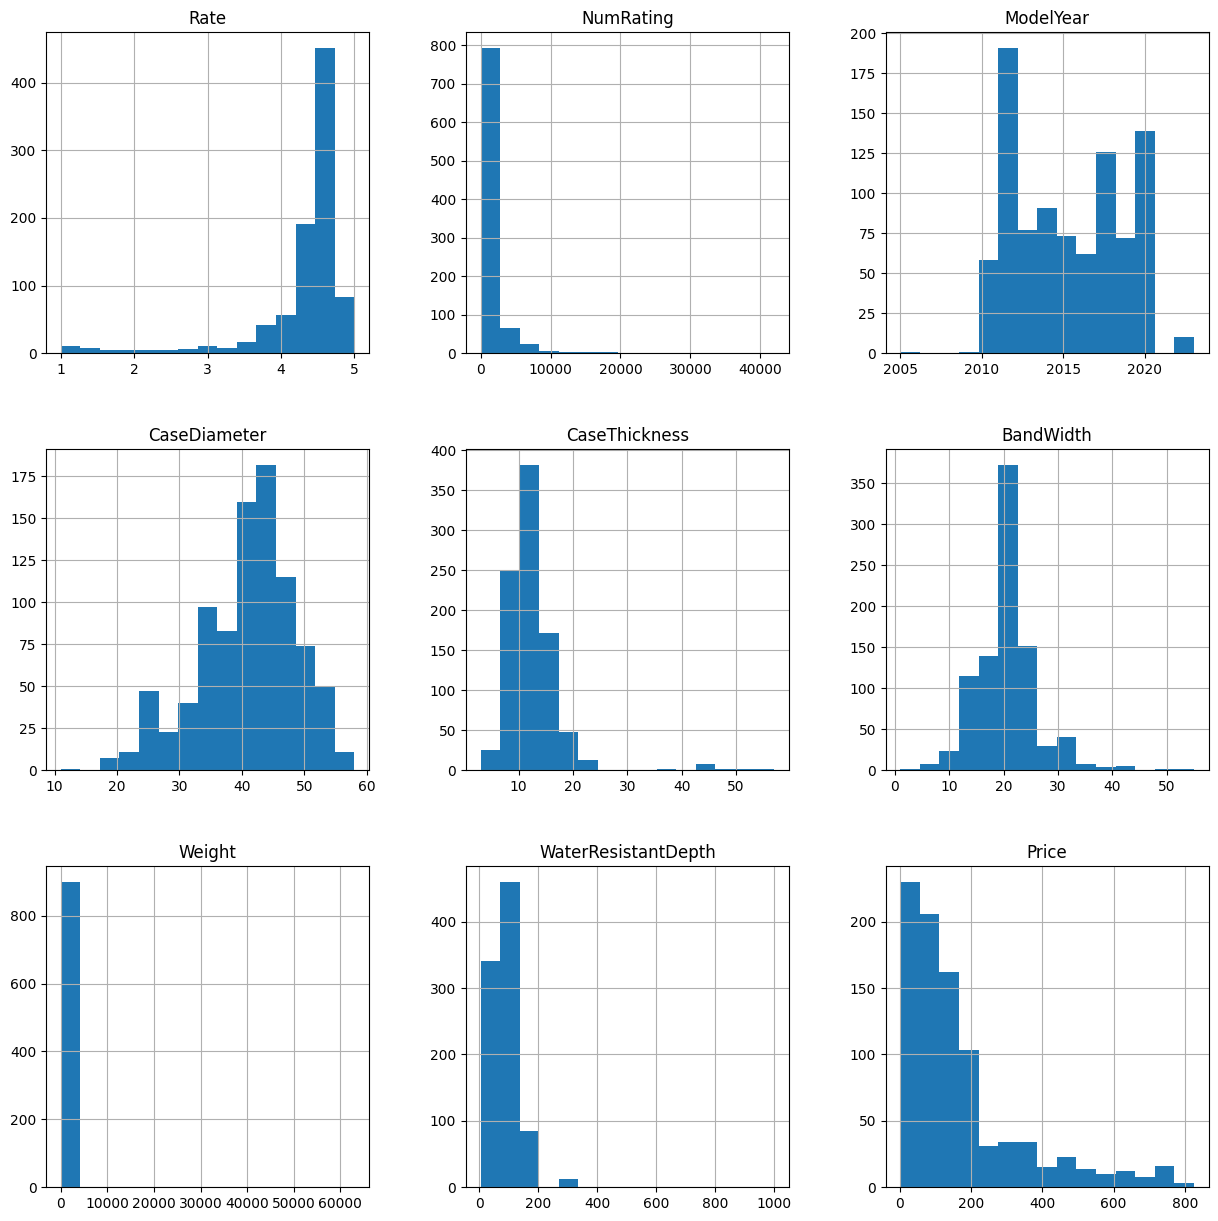

In [ ]:
df.hist(figsize=(15,15),bins=15)
plt.show()

## 2.1.2 Thống kê số lượng đồng hồ theo Brand và Display

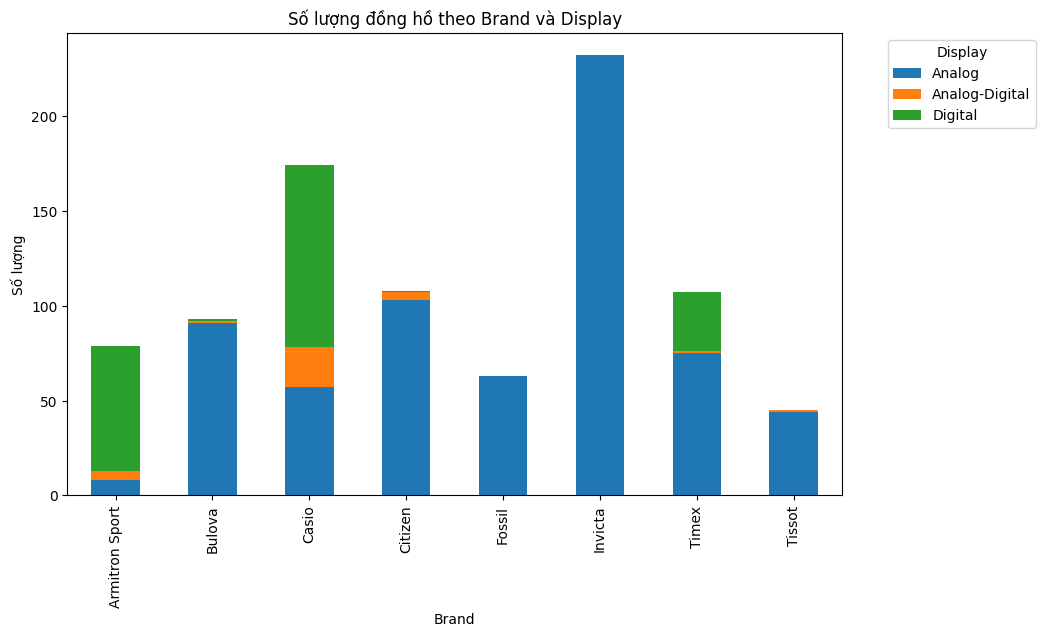

In [ ]:
# Thống kê số lượng đồng hồ theo Brand và Display
brand_display_count = df.groupby(['Brand', 'Display']).size().unstack(fill_value=0)

# Vẽ biểu đồ
brand_display_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Số lượng đồng hồ theo Brand và Display')
plt.xlabel('Brand')
plt.ylabel('Số lượng')
plt.legend(title='Display', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 2.1.3 Các nhãn hiệu đồng hồ có trong datasheet và sự phổ biến của chúng.

In [ ]:


# Calculate the counts by brand
counts = df['Brand'].value_counts().reset_index()
counts.columns = ['Brand', 'count']

# Select the top 50 brands
top_brands = counts.sort_values('count', ascending=False).head(50)

# Create the Plotly bar plot with custom color
fig = px.bar(
    top_brands,
    x='Brand',
    y='count',
    title='Sự phổ biến của các nhãn hàng đồng hồ',
    labels={'Brand': 'Brand', 'count': 'Count'},
    color_discrete_sequence=['light green'],  # Set the color to pink
)

fig.update_xaxes(tickangle=-45, tickfont=dict(size=12))
fig.update_yaxes(tickfont=dict(size=12))
fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Count',
    title_font=dict(size=20),
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    showlegend=False,
    plot_bgcolor='rgba(255, 255, 255, 0)',  # Make the background transparent
)

fig.show()

## 2.1.4 Những thương hiệu có giá tiền cao nhất

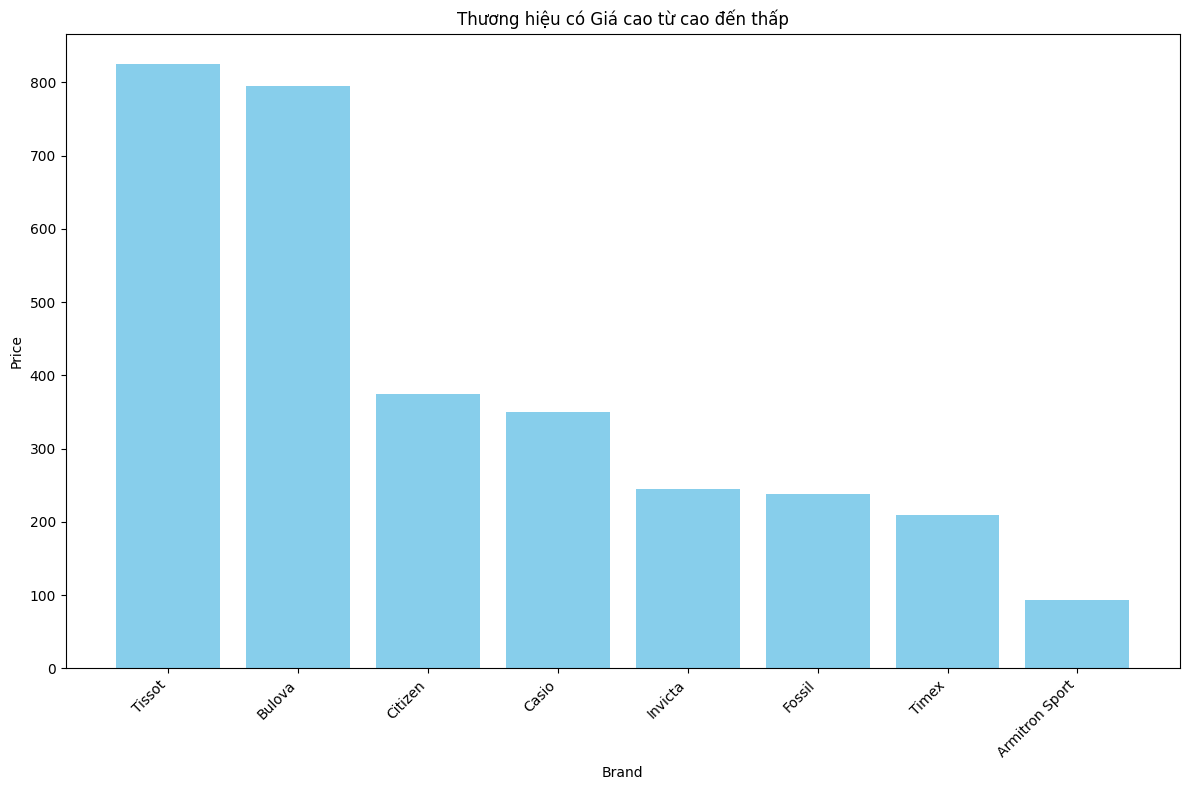

In [ ]:
import matplotlib.pyplot as plt

# Sắp xếp dữ liệu theo giá từ cao đến thấp
sorted_data = df.sort_values(by='Price', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Brand'], sorted_data['Price'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Thương hiệu có Giá cao từ cao đến thấp')
plt.xticks(rotation=45, ha='right')  # Đặt góc và hướng của nhãn trục x
plt.tight_layout()  # Để tránh việc bị cắt nhãn trục x
plt.show()


# 2.2 Tìm biến ảnh hưởng đến giá

In [ ]:
df1 = df.copy()

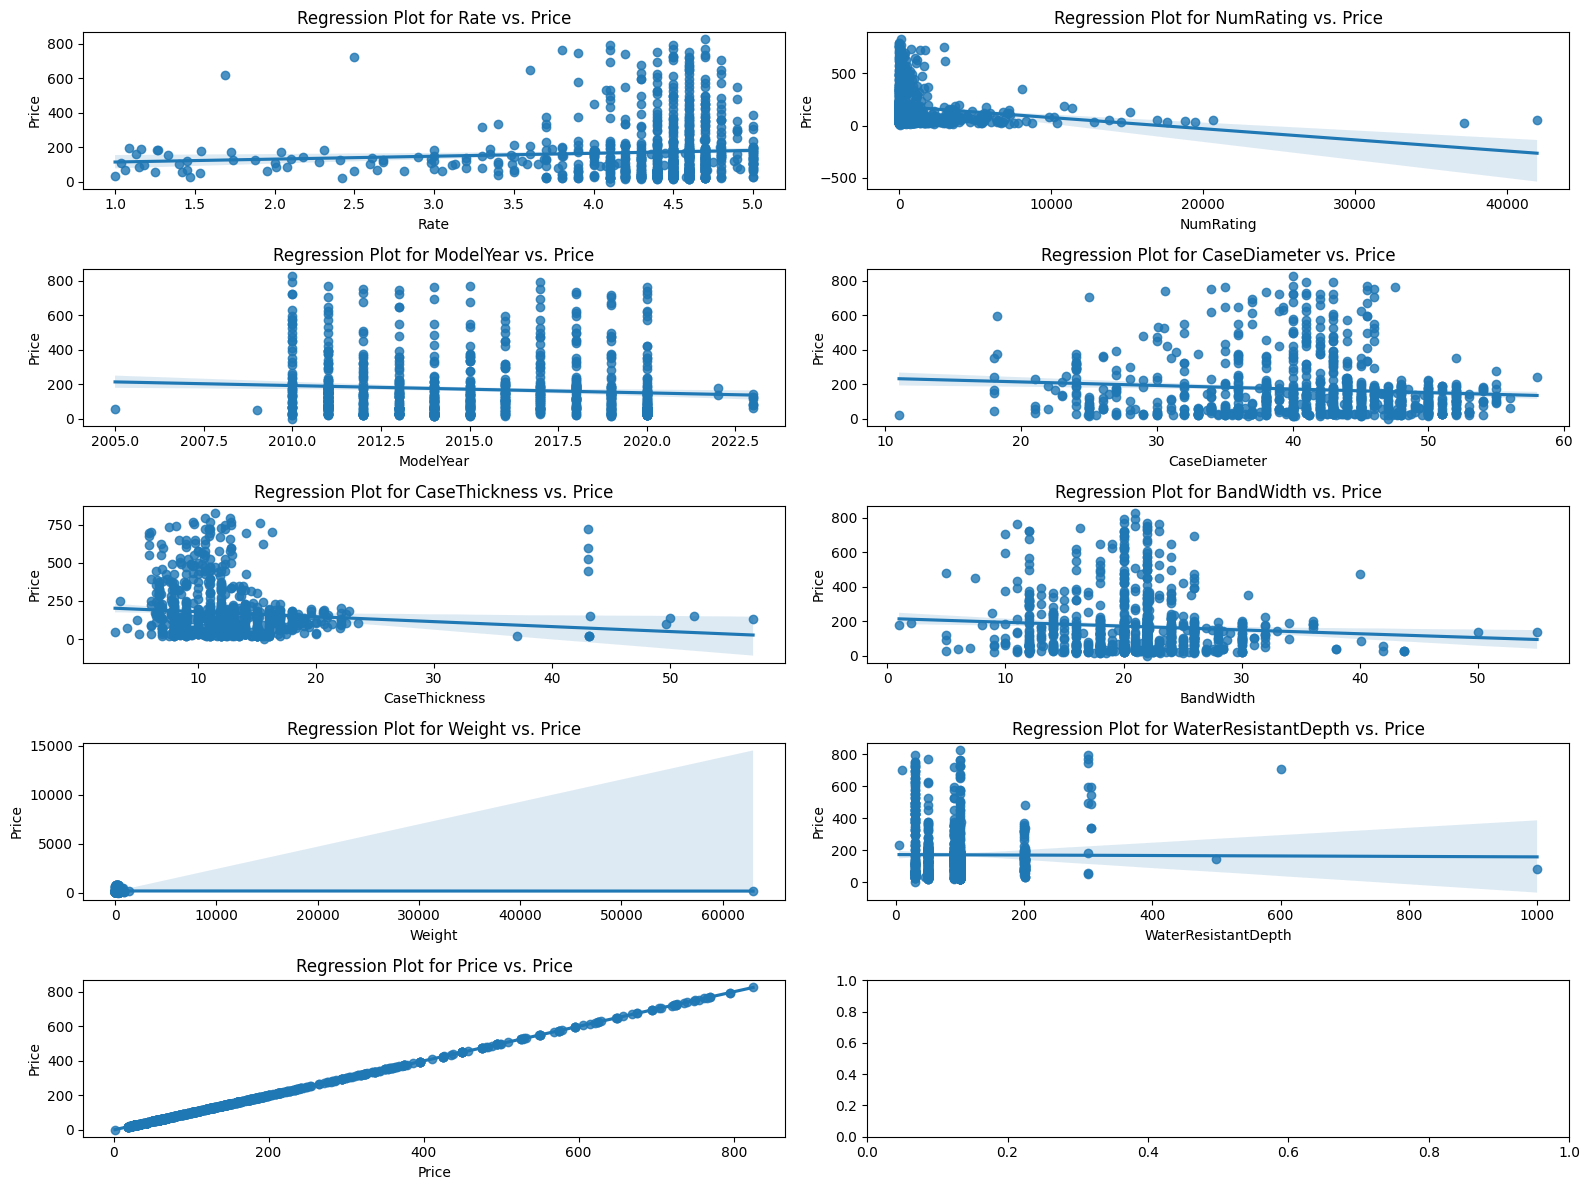

In [ ]:


# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Determine the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / 2)
num_cols = min(2, num_plots)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array if there is only one row
axes = axes.flatten()

# Create a regplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.regplot(x=col, y='Price', data=df, ax=axes[i])
    axes[i].set_title(f'Regression Plot for {col} vs. Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

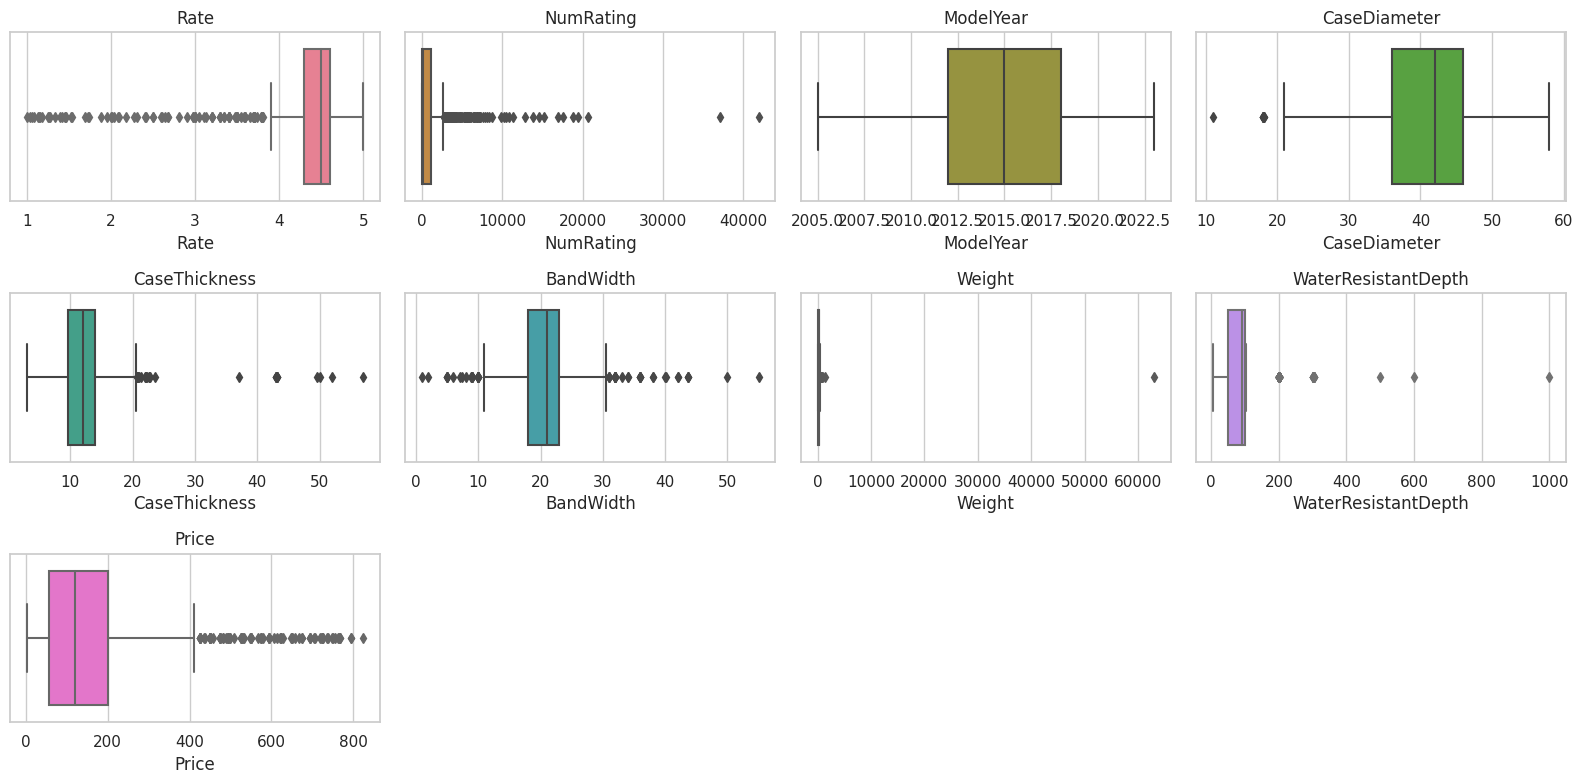

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ cột 'Name' để vẽ boxplot cho các biến số
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Màu sắc cho biểu đồ boxplot
colors = sns.color_palette("husl", len(df_numeric.columns))

# Vẽ boxplot cho từng biến số với màu sắc khác nhau
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

for i, (column, color) in enumerate(zip(df_numeric.columns, colors), 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color=color)
    plt.title(column)

plt.tight_layout()
plt.show()


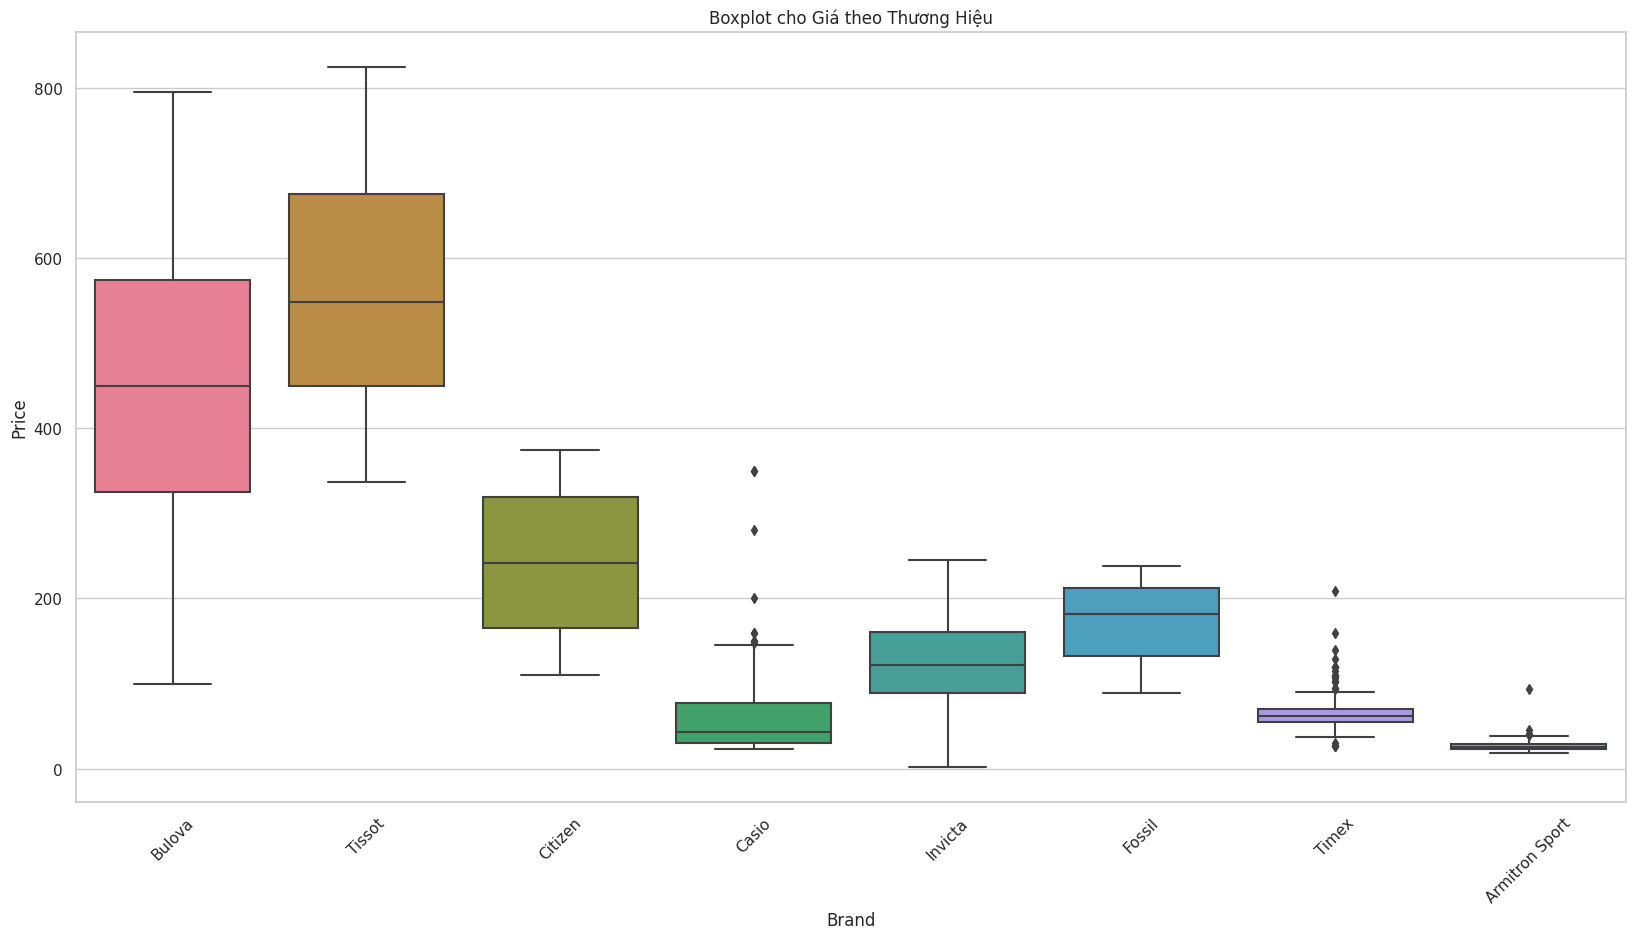

In [ ]:
palette = sns.color_palette("husl", len(df['Brand'].unique()))

# Vẽ boxplot cho từng thương hiệu với màu sắc khác nhau
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.boxplot(x='Brand', y='Price', data=df, palette=palette)
plt.xticks(rotation=45)
plt.title('Boxplot cho Giá theo Thương Hiệu')
plt.show()

### Chuyển các giá trị phân loại thành giá trị số

In [ ]:
df['Brand'] = df['Brand'].replace({
    'Invicta': 1,
    'Casio': 2,
    'Citizen': 3,
    'Timex': 4,
    'Bulova': 5,
    'Armitron Sport': 6,
    'Fossil': 7,
    'Tissot': 8,
    'Timex Tribute': 4
})

In [ ]:
df['Movement'] = df['Movement'].replace({
    'Quartz': 1,
    'Japanese Quartz': 2,
    'Automatic': 3,
    'Eco-Drive': 4,
    'Swiss Quartz': 5,
    'Swiss Automatic': 6,
    'Japanese Automatic': 7,
    'Mechanical Hand Wind': 8,
    'Digital': 9,
    'Processor': 10,
    'Ana-Digi': 11,
    'Tough Solar': 12,
    'quartz,japanese quartz,analog_quartz': 13,
    'Swiss tactile quartz': 14
})

In [ ]:
df['Display'] = df['Display'].replace({
    'Analog': 1,
    'Digital': 2,
    'Analog-Digital': 3
})

In [ ]:
df['Movement'] = df['Movement'].replace({
    'Quartz': 1,
    'Japanese Quartz': 2,
    'Automatic': 3,
    'Eco-Drive': 4,
    'Swiss Quartz': 5,
    'Swiss Automatic': 5,
    'Japanese Automatic': 6,
    'Mechanical Hand Wind': 7,
    'Digital': 8,
    'Processor': 9,
    'Ana-Digi': 10,
    'Tough Solar': 11,
    'quartz,japanese quartz,analog_quartz': 12,
    'Swiss tactile quartz': 13
})

## 3. Huấn luyện mô hình

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Tiền xử lý dữ liệu
# 1.1 Xử lý dữ liệu thiếu
# Loại bỏ cột 'Price' vì đây là biến mục tiêu
X = df.drop('Price', axis=1)
y = df['Price']

# 1.2 Chuyển đổi dữ liệu hạng mục
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Gói tiền xử lý cho dữ liệu số học và dữ liệu hạng mục
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # handle_unknown='ignore' sẽ xử lý các hạng mục không xác định
    ])

# 1.3 Chuẩn hóa đặc trưng
# Chuẩn hóa đặc trưng số học với hỗ trợ đầu vào thưa thớt
scaler = StandardScaler(with_mean=False)

# 2. Lựa chọn mô hình
# 2.1 Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2 Chọn một mô hình
model = RandomForestRegressor()

# 2.3 Huấn luyện mô hình
# Gói mã tiền xử lý và mô hình vào một đường ống
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('scaler', scaler),
                             ('model', model)])

# Fit mô hình
pipeline.fit(X_train, y_train)

# 4. Đánh giá mô hình
# 4.1 Đánh giá mô hình
# Tạo dự đoán trên tập kiểm thử
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Độ lệch bình phương trung bình: {mse}')


Độ lệch bình phương trung bình: 5441.001633097733


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 48.256811602209936


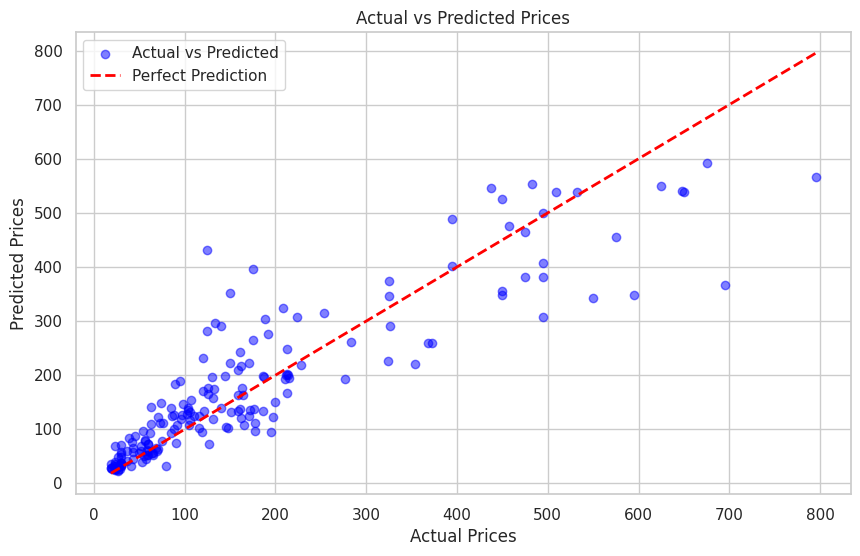

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Actual vs Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(mape)

35.77349445478542


<b> Kết quả MAPE Ghi chú: </b>

<li>Dưới 10% = Xuất sắc
<li>10% - 20% = Tốt
<li>21% - 50% = Hợp lý
<li>Trên 50% = Không chính xác

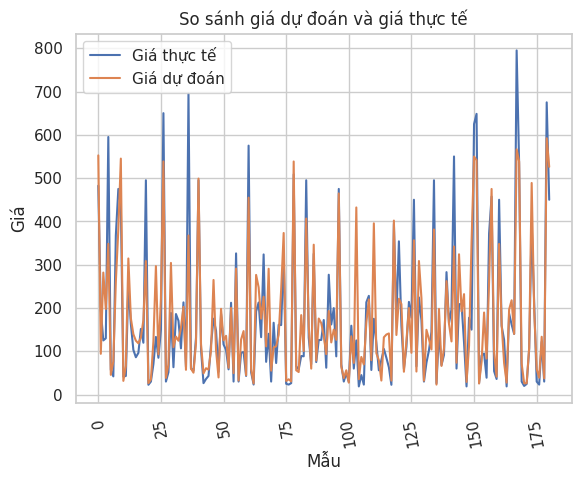

In [ ]:
# Tạo biểu đồ so sánh
plt.plot(range(len(y_test)), y_test, label='Giá thực tế')
plt.plot(range(len(y_pred)), y_pred, label='Giá dự đoán')

# Đặt tên cho trục x và trục y
plt.xlabel('Mẫu')
plt.ylabel('Giá')
plt.xticks(rotation=100)

# Đặt tiêu đề cho biểu đồ
plt.title('So sánh giá dự đoán và giá thực tế')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
